<a href="https://colab.research.google.com/github/zahranorozzadeh/DeepLearning44/blob/main/code44.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Sep 22 04:32:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    36W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from matplotlib import pyplot as plt
import numpy as np
import os
import datetime
# !pip install wandb
import wandb
from wandb.keras import WandbCallback


In [6]:
dataset_path = "/content/drive/MyDrive/Datasets/Flowers"
width = height = 224
batch_size = 32

#data augmentation
data_generator = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 20,
    zoom_range = 0.1,
    validation_split = 0.2
)

train_data = data_generator.flow_from_directory(
    os.path.join(dataset_path,'Train'),
    target_size= (width,height),
    class_mode = 'categorical',
    batch_size = batch_size,
    shuffle = True,
    subset='training'
)

val_data = data_generator.flow_from_directory(
    os.path.join(dataset_path,'Train'),
    target_size =(width,height),
    class_mode = 'categorical',
    batch_size = batch_size,
    shuffle = True,
    subset='validation'
)

Found 884 images belonging to 17 classes.
Found 204 images belonging to 17 classes.


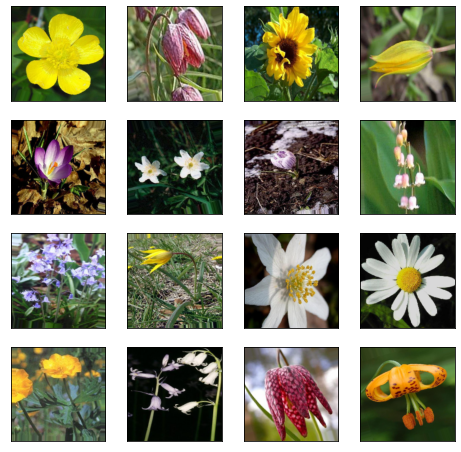

In [7]:
train_images = next(train_data)[0]
plt.figure(figsize=(8,8))#plot 16 images

for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)

In [ ]:
# model1=tf.keras.applications.ResNet50(
#        input_shape=(width,height,3)
#    )

In [ ]:
# model1.summary()

In [ ]:
# model2=tf.keras.applications.ResNet50(
#        input_shape=(width,height,3),
#        include_top = False
# )

In [ ]:
# model2.summary()

In [8]:
base_model = tf.keras.applications.VGG16(
       input_shape=(width,height,3),
       include_top = False,
       weights="imagenet"
  )

In [9]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
#freeze
for layer in base_model.layers:
  layer.trainable = False

In [11]:
model = tf.keras.Sequential([
      base_model,
      layers.Flatten(),
      layers.Dense(1024, activation = 'relu'),
      layers.Dense(128, activation = 'relu'),
      layers.Dense(17, activation = 'softmax'),
       

])

In [12]:
wandb.init(project="17-flowers-classification")
config = wandb.config
config.learning_rate = 0.001

wandb: Currently logged in as: zahra-norozzadeh (use `wandb login --relogin` to force relogin)


In [13]:
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=config.learning_rate),
    metrics = 'accuracy'
)

In [1]:
model.fit(train_data,
          steps_per_epoch=train_data.samples/batch_size, #884/32
          validation_data = val_data,
          validation_steps= val_data.samples/batch_size, #204/32
          epochs=10,
          # callbacks=[WandbCallback()]
          )
   
